<a href="https://colab.research.google.com/github/shreyan79007675/fsd-assignment1/blob/master/codegnanproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
!pip install openpyxl plotly -q

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns; sns.set_theme()
import plotly.figure_factory as ff
from itertools import combinations
from collections import Counter
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

Data wrangling
Data gathering
Loading dataset


In [ ]:
Customers_data = pd.read_excel('/content/drive/MyDrive/Database.xlsx',
                              'Customers',
                              dtype={'CustomerKey':str},
                              parse_dates=['BirthDate','DateFirstPurchase']
                              )

In [ ]:
Product_data = pd.read_excel('/content/drive/MyDrive/Database.xlsx',
                              'Product',
                              dtype={'ProductKey':str},
                              parse_dates=['StartDate']
                              )

In [ ]:
Sales_data = pd.read_excel('/content/drive/MyDrive/Database.xlsx',
                              'Sales',
                              dtype={'ProductKey':str,
                                     'CustomerKey':str,
                                     'PromotionKey':str,
                                     'SalesTerritoryKey':str},
                              parse_dates=['OrderDate', 'ShipDate']
                              )
Sales_data['DateKey'] = Sales_data['OrderDate'].astype(str)

In [ ]:
Territory_data = pd.read_excel('/content/drive/MyDrive/Database.xlsx',
                              'Territory',
                              dtype={'SalesTerritoryKey':str}
                              )

Merging data

In [ ]:
temp_data = pd.merge(Sales_data, Product_data, on='ProductKey', how='inner')
df = pd.merge(temp_data, Customers_data, on='CustomerKey', how='inner')
df = pd.merge(df, Territory_data, on='SalesTerritoryKey', how='inner')

In [ ]:
#assesing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58189 entries, 0 to 58188
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  object        
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  object        
 4   PromotionKey          58189 non-null  object        
 5   SalesTerritoryKey     58189 non-null  object        
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  DateKey         

In [ ]:
# Check shape of the data after merging
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]} \n")

Number of Rows: 58189
Number of Columns: 46 



In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SalesOrderLineNumber,58189.0,1.887453,1.018829,1.0000,1.0000,2.0000,2.0000,8.0000
OrderQuantity,58189.0,1.569386,1.047532,1.0000,1.0000,1.0000,2.0000,4.0000
UnitPrice,58189.0,413.888218,833.052938,0.5725,4.9900,24.4900,269.9950,3578.2700
TotalProductCost,58189.0,296.539185,560.171436,0.8565,3.3623,12.1924,343.6496,2171.2942
SalesAmount,58189.0,503.666270,941.462817,2.2900,8.9900,32.6000,539.9900,3578.2700
TaxAmt,58189.0,40.293303,75.317027,0.1832,0.7192,2.6080,43.1992,286.2616
StandardCost,58189.0,296.539185,560.171436,0.8565,3.3623,12.1924,343.6496,2171.2942
ListPrice,58189.0,503.666270,941.462817,2.2900,8.9900,32.6000,539.9900,3578.2700
DaysToManufacture,58189.0,1.045215,1.757395,0.0000,0.0000,0.0000,4.0000,4.0000
YearlyIncome,58189.0,59769.887779,33128.041818,10000.0000,30000.0000,60000.0000,80000.0000,170000.0000


In [ ]:
# Check for duplicate data
df.duplicated().sum()



0

In [ ]:
#Handling missing data

def missing_pct(df):
    # Calculate missing value and their percentage for each column
    missing_count_percent = df.isnull().sum() * 100 / df.shape[0]
    df_missing_count_percent = pd.DataFrame(missing_count_percent).round(2)
    df_missing_count_percent = df_missing_count_percent.reset_index().rename(
                    columns={
                            'index':'Column',
                            0:'Missing_Percentage (%)'
                    }
                )
    df_missing_value = df.isnull().sum()
    df_missing_value = df_missing_value.reset_index().rename(
                    columns={
                            'index':'Column',
                            0:'Missing_value_count'
                    }
                )
    # Sort the data frame
    #df_missing = df_missing.sort_values('Missing_Percentage (%)', ascending=False)
    Final = df_missing_value.merge(df_missing_count_percent, how = 'inner', left_on = 'Column', right_on = 'Column')
    Final = Final.sort_values(by = 'Missing_Percentage (%)',ascending = False)
    return Final

In [ ]:
# Applying the custom function
missing_pct(df)

,Column,Missing_value_count,Missing_Percentage (%)
18,Color,27442,47.16
0,ProductKey,0,0.00
34,NumberChildrenAtHome,0,0.00
26,FirstName,0,0.00
27,LastName,0,0.00
28,FullName,0,0.00
29,BirthDate,0,0.00
30,MaritalStatus,0,0.00
31,Gender,0,0.00
32,YearlyIncome,0,0.00


In [ ]:


#  Drop columns with nan values
df= df.dropna(axis=1)

Adding columns

In [ ]:
# Extracting Year from OrderDate
df['sale_year'] = df['OrderDate'].dt.year

# Extracting Month from OrderDate
df['sale_month'] = df['OrderDate'].dt.month

# Extracting day from OrderDate
df['sale_day'] = df['OrderDate'].dt.day

# Extracting dayofweek from OrderDate
df['sale_week'] = df['OrderDate'].dt.dayofweek

# Extracting day_name from OrderDate
df['sale_day_name'] = df['OrderDate'].dt.day_name()

# Extracting Month Year from OrderDate
df['year_month'] = df['OrderDate'].apply(lambda x:x.strftime('%Y-%m'))

# Calculate Total Invoice Amount
df['total_Invoice_amount'] = df['SalesAmount'] + df['TaxAmt']

# Considering only salesamount and total_sales_amount to calculate profit 
df['profit'] = (df['UnitPrice']*df['OrderQuantity']) - df['TotalProductCost']

# Removing extra character from the string
df['ProductName'] = df['ProductName'].str.replace(',','-')

# Calculate Age
df['Age'] = df['OrderDate'].dt.year - df['BirthDate'].dt.year

Exploring data
Basic Overview
List of product's category

In [ ]:
df['Category'].unique().tolist()

['Bikes', 'Accessories', 'Clothing']

In [ ]:
df['SubCategory'].unique().tolist()

['Road Bikes',
 'Mountain Bikes',
 'Bottles and Cages',
 'Gloves',
 'Tires and Tubes',
 'Helmets',
 'Touring Bikes',
 'Jerseys',
 'Cleaners',
 'Caps',
 'Hydration Packs',
 'Socks',
 'Fenders',
 'Vests',
 'Bike Racks',
 'Bike Stands',
 'Shorts']

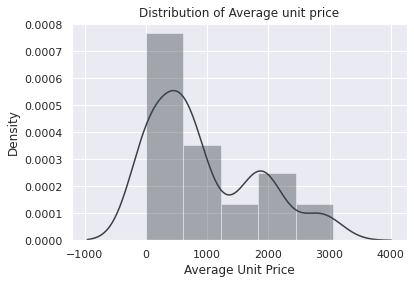

In [ ]:
#Analysing UnitPrice

Avg_unit_price = df.groupby(['ProductKey'])['UnitPrice'].mean()
ax = sns.distplot(Avg_unit_price, kde=True, hist=True, color='#374045')
ax.set(title='Distribution of Average unit price',
       xlabel='Average Unit Price');

In [ ]:
#Sales order number distribution

n_orders = df.groupby(['CustomerKey'])['SalesOrderNumber'].nunique()
multi_orders_perc = np.sum(n_orders > 1)/df['CustomerKey'].nunique()
print(f"{100*multi_orders_perc:.2f}% of customers ordered more than once.")

36.97% of customers ordered more than once.


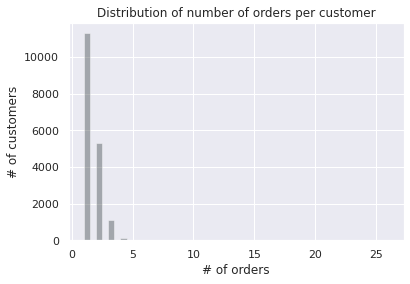

In [ ]:
ax = sns.distplot(n_orders, kde=False, color='#374045')
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders',
       ylabel='# of customers');

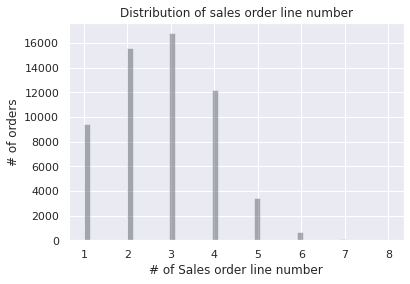

In [ ]:
#Sales order line number distribution

n_salesordernumber = df.groupby(['SalesOrderNumber'])['SalesOrderLineNumber'].transform('max')
ax = sns.distplot(n_salesordernumber, kde=False, color='#374045')
ax.set(title='Distribution of sales order line number',
       xlabel='# of Sales order line number',
       ylabel='# of orders');

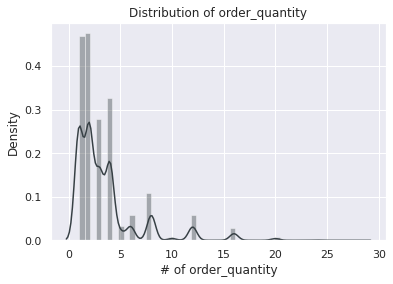

In [ ]:
#Sales Order Quantity distribution

n_order_quantity = df.groupby(['SalesOrderNumber'])['OrderQuantity'].sum()
ax = sns.distplot(n_order_quantity, kde=True, hist=True,color='#374045')
ax.set(title='Distribution of order_quantity',
       xlabel='# of order_quantity',
       );

In [ ]:
#Age Distribution

bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['agerange'] = pd.cut(df.Age, bins, labels = labels,include_lowest = True)

age_distribution = df['agerange'].value_counts().to_frame().reset_index()

age_distribution.columns = ['Age Range','Population count']

fig = px.bar(age_distribution, x='Age Range', y='Population count', color_discrete_sequence=['#374045'])
fig.update_layout(
    autosize=True,
    width=500,
    height=500,
    font=dict(size=10))
fig.show()
#Age Distribution

A sizable portion of the clientele is made up of people between the ages of 40 and 59.
Sales
Year wise sales

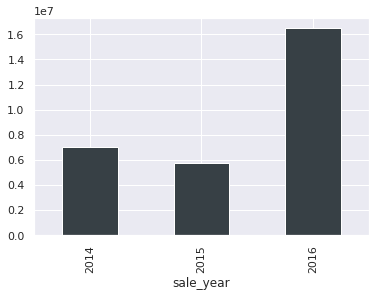

In [ ]:
df.groupby('sale_year')['SalesAmount'].sum().plot(kind='bar', color='#374045');

Top 5 Selling Product


In [ ]:
top_selling_product = df.groupby(['Category', 'SubCategory', 'ProductName'])['OrderQuantity'].sum().nlargest(5).to_frame()
top_selling_product

OrderQuantity
Category    SubCategory       ProductName                         
Accessories Bottles and Cages Water Bottle - 30 oz.           6370
            Tires and Tubes   Patch Kit/8 Patches             4705
                              Mountain Tire Tube              4551
                              Road Tire Tube                  3544
            Helmets           Sport-100 Helmet- Red           3398

In [ ]:
top_selling_product.reset_index(inplace=True)
fig = px.bar(top_selling_product, x='ProductName', y='OrderQuantity',color_discrete_sequence=['#374045'])
fig.update_layout(
    autosize=True,
    width=500,
    height=300,
    margin=dict(
        l=25,
        r=25,
        b=10,
        t=10,
    ),
    font=dict(size=8))
fig.show()


Quantity ordered based on category and subcategory from 2014 to 2016

In [ ]:
cat_subcat_qty = df.groupby(['sale_year','Category', 'SubCategory'])['OrderQuantity'].sum().to_frame()
cat_subcat_qty = cat_subcat_qty.sort_values(['sale_year', 'Category'], ascending=True)
cat_subcat_qty.style.bar(subset=['OrderQuantity'], color='#D9B300')

Country wise quantity ordered

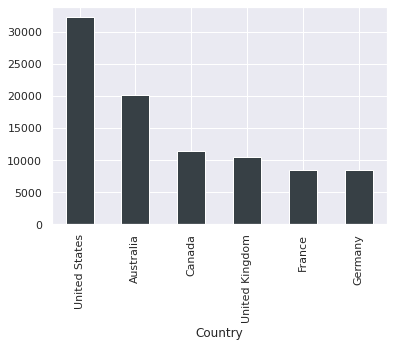

In [ ]:
country_qty_sales = df.groupby('Country')['OrderQuantity'].sum().sort_values(ascending=False)
country_qty_sales.plot(kind='bar', color='#374045');

High quantity of products is ordered from Australia and United States
Profit
Overall profit based on order year, category and subcategory

In [ ]:
cat_subcat_profit = df.groupby(['sale_year','Category', 'SubCategory'])['profit'].sum().to_frame()

#Sorting the results
cat_subcat_profit = cat_subcat_profit.sort_values(['sale_year', 'Category'], ascending=True)
cat_subcat_profit.style.bar(subset=['profit'], color='#D9B300')

Major Profit is contributed by the Bike Category
Low profit contributing product

In [ ]:
df.groupby(['Category', 'SubCategory','ProductName'])['profit'].sum().nsmallest(10).to_frame()

profit
Category    SubCategory     ProductName                              
Clothing    Socks           Racing Socks- L                 1474.4574
                            Racing Socks- M                 1581.3837
Accessories Cleaners        Bike Wash - Dissolver           4299.8688
            Tires and Tubes Patch Kit/8 Patches             4314.8350
Clothing    Caps            AWC Logo Cap                    4331.8315
Accessories Tires and Tubes Touring Tire Tube               4363.8089
Clothing    Jerseys         Long-Sleeve Logo Jersey- XL     4495.6007
                            Short-Sleeve Classic Jersey- L  4544.8782
                            Long-Sleeve Logo Jersey- S      4610.5777
                            Short-Sleeve Classic Jersey- M  4793.2322

Profitability by country

In [ ]:
country_sales = pd.DataFrame(df.groupby('Country').sum()[['SalesAmount', 'profit']])
country_sales.reset_index(inplace=True)

fig = px.bar(country_sales, x='Country', y='profit',text_auto='.2s',
             color='SalesAmount',
             height=400)
fig.show()

Metrics Of the Evaluation

1)What was the best month for sales? How much was earned that month ?

In [ ]:
month_sales = df.groupby('sale_month').sum()[['SalesAmount', 'profit']]
month_sales.reset_index(inplace=True)
fig = px.bar(month_sales, x='sale_month', y='SalesAmount',text_auto='.2s',
             hover_data=['sale_month', 'SalesAmount'], color='profit',
             height=400)
fig.show()

2)Which products are most often sold together?

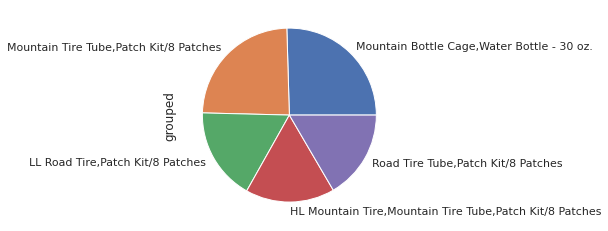

In [ ]:
# By setting keep on False, all duplicates are True since we only want repeated order number
dup_order = df[df['SalesOrderNumber'].duplicated(keep=False)]

# Group the data based on sales order number and product name because the products
# that bought together will have share same order number
dup_order['grouped'] = df.groupby('SalesOrderNumber')['ProductName'].transform(lambda x: ','.join(x))
dup_order = dup_order[['SalesOrderNumber', 'grouped']].drop_duplicates()

count = dup_order['grouped'].value_counts()[0:5].plot.pie()

In [ ]:
count = Counter()

for row in dup_order['grouped']:
    row_list  = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('Mountain Bottle Cage', 'Water Bottle - 30 oz.') 1623
('Road Bottle Cage', 'Water Bottle - 30 oz.') 1513
('HL Mountain Tire', 'Mountain Tire Tube') 915
('Touring Tire', 'Touring Tire Tube') 758
('Mountain Tire Tube', 'Patch Kit/8 Patches') 737
('Mountain Tire Tube', 'ML Mountain Tire') 727
('Water Bottle - 30 oz.', 'AWC Logo Cap') 599
('Road Tire Tube', 'ML Road Tire') 580
('Road Tire Tube', 'Patch Kit/8 Patches') 556
('HL Road Tire', 'Road Tire Tube') 552


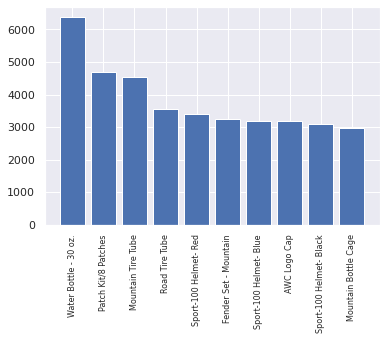

In [ ]:
product_group = df.groupby('ProductName')
quantity_ordered = product_group['OrderQuantity'].sum().sort_values(ascending=False)[:10]
products = quantity_ordered.index.tolist()

plt.bar(products, quantity_ordered, )
plt.xticks(products, rotation='vertical', size=8)
plt.show()

In [ ]:
prices = df.groupby('ProductName').mean()['UnitPrice']
prices = prices[products]

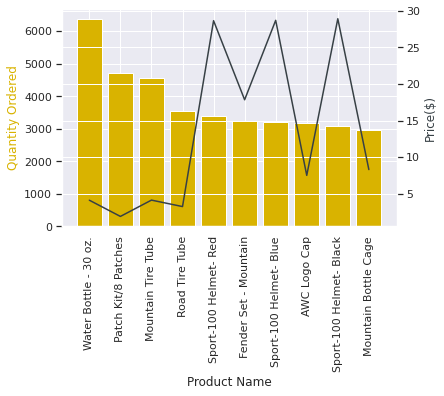

In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='#D9B300')
ax2.plot(products, prices, '#374045')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='#D9B300')
ax2.set_ylabel('Price($)', color='#374045')
ax1.set_xticklabels(products, rotation='vertical')

plt.show();

3)Compare most ordered product by gender

In [ ]:
male = df[df["Gender"]=="M"]
female = df[df["Gender"]=="F"]

male_ord_qty = male.groupby(['ProductName'],as_index=False)['OrderQuantity'].sum().nlargest(5,'OrderQuantity').sort_values('ProductName')
male_ord_qty.columns=['ProductName','Order_Qty_Male']

female_ord_qty = female.groupby(['ProductName'],as_index=False)['OrderQuantity'].sum().nlargest(5,'OrderQuantity').sort_values('ProductName')
female_ord_qty.columns=['ProductName','Order_Qty_Female']

df_merge = pd.merge(male_ord_qty, female_ord_qty, on='ProductName')

fig = px.line(df_merge, x="ProductName", y=["Order_Qty_Male","Order_Qty_Female"])
fig.update_layout(
    autosize=True,
    width=800,
    height=400)
fig.show()

Number of childer and Purchase correlation

In [ ]:
df_1 = df.groupby(["NumberChildrenAtHome"])["SalesAmount"].mean().to_frame()
df_1.reset_index(inplace=True)
fig = px.bar(df_1, x='NumberChildrenAtHome', y='SalesAmount',color_discrete_sequence=['#374045'])
fig.update_layout(
    autosize=False,
    width=300,
    height=300,
    margin=dict(
        l=25,
        r=25,
        b=10,
        t=10,
    ))
fig.show()

Education, Occupation and Purchase correlation



In [ ]:
fig = px.imshow(df.groupby(["Education", "Occupation"])["SalesAmount"].mean().unstack(),
                labels=dict(color="Average Purchase"))
fig.show()

Maritial Status single and above 50 age purchase

In [ ]:
df_2 = df[(df['MaritalStatus']=='S')&(df['Age']>50)]

df_2 = df_2.groupby('agerange')['SalesAmount'].mean().to_frame().dropna()
df_2.reset_index(inplace=True)
fig = px.bar(df_2, x='agerange', y='SalesAmount', color_discrete_sequence=['#374045'])
fig.update_layout(
    autosize=False,
    width=300,
    height=300,
    margin=dict(
        l=25,
        r=25,
        b=10,
        t=10,
    ))
fig.show()

Which age group has produced the most revenue?

In [ ]:
df_3 = df.groupby('agerange')['SalesAmount'].mean().to_frame().dropna()
df_3.reset_index(inplace=True)
fig = px.bar(df_3, x='agerange', y='SalesAmount', color_discrete_sequence=['#374045'])
fig.update_layout(
    autosize=False,
    width=300,
    height=300,
    margin=dict(
        l=25,
        r=25,
        b=10,
        t=10,
    ))
fig.show()

Yearly income range and purchase correlation

In [ ]:
def create_bins(lower_bound, width, quantity):
    """ create_bins returns an equal-width (distance) partitioning. 
        It returns an ascending list of tuples, representing the intervals.
        A tuple bins[i], i.e. (bins[i][0], bins[i][1])  with i > 0 
        and i < quantity, satisfies the following conditions:
            (1) bins[i][0] + width == bins[i][1]
            (2) bins[i-1][0] + width == bins[i][0] and
                bins[i-1][1] + width == bins[i][1]
    """
    

    bins = []
    for low in range(lower_bound, 
                     lower_bound + quantity*width + 1, width):
        bins.append((low, low+width))
    return bins

    

In [ ]:
bins = create_bins(lower_bound=10000,
                   width=30000,
                   quantity=5)
bins2 = pd.IntervalIndex.from_tuples(bins)
df['salary_range'] = pd.cut(df['YearlyIncome'], bins2)

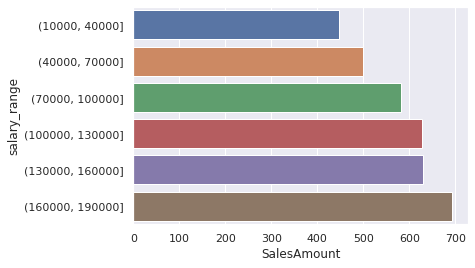

In [ ]:
df_4 = df.groupby('salary_range')['SalesAmount'].mean().to_frame()
df_4.reset_index(inplace=True)
sns.barplot(x="SalesAmount", y="salary_range", data=df_4);

Paritial high school vs bachlors income mean and most ordered product



In [ ]:
df_6 = df[(df['Education']=='Partial High School')|(df['Education']=='Bachelors')].groupby('Education')['YearlyIncome'].mean().to_frame()

In [ ]:
df_6.reset_index(inplace=True)
fig = px.bar(df_6, x='Education', y='YearlyIncome')
fig.update_layout(
    autosize=False,
    width=300,
    height=300,
    margin=dict(
        l=25,
        r=25,
        b=10,
        t=10,
    ))
fig.show()

In [ ]:
df_7 = df[(df['Education']=='Partial High School')|(df['Education']=='Bachelors')]
df_7 = df_7.groupby(['Education','ProductName'])['OrderQuantity'].mean().to_frame().sort_values('OrderQuantity', ascending=False)[:10]
df_7.reset_index(inplace=True)
fig = px.bar(df_7, x="Education",
             y="OrderQuantity", color="ProductName",
             title="Paritial high school vs bachlors expense analysis",
             barmode="group")
fig.show()

Customer Segmentation

In [ ]:
# RFM stands for recency, frequency, monetary value.
#  In business analytics, we often use this concept to divide
#  customers into different segments, like high-value customers,
#  medium value customers or low-value customers, and similarly many others.

# Recency: How recently has the customer made a transaction with us
# Frequency: How frequent is the customer in ordering/buying some product from us
# Monetary: How much does the customer spend on purchasing products from us

#  calculating recency for customers who had made a purchase with a company



df_recency = df.groupby(by='FullName',
                        as_index=False)['OrderDate'].max()
df_recency.columns = ['CustomerName', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)



In [ ]:
#  calculating the frequency of frequent transactions of the
#  customer in ordering/buying some product from the company.


frequency_df = df.drop_duplicates().groupby(
    by=['FullName'], as_index=False)['OrderDate'].count()
frequency_df.columns = ['CustomerName', 'Frequency']
# frequency_df.head()

In [ ]:
monetary_df = df.groupby(by='FullName', as_index=False)['SalesAmount'].sum()
monetary_df.columns = ['CustomerName', 'Monetary']
# monetary_df.head()

In [ ]:
# merging dataset
rf_df = df_recency.merge(frequency_df, on='CustomerName')
rfm_df = rf_df.merge(monetary_df, on='CustomerName').drop(
    columns='LastPurchaseDate')
# rfm_df.head()

In [ ]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
# rfm_df.head()

In [ ]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
# rfm_df[['CustomerName', 'RFM_Score']].head(7)

In [ ]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
# rfm_df[['CustomerName', 'RFM_Score', 'Customer_segment']].head(20)

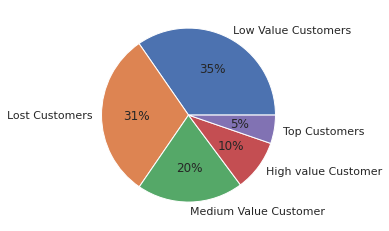

In [ ]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

#According to the customer segmentation described above, approximately 15% of our clients are high value clients, whereas the majority of our clientele are low value and lost clients

Cohort Analysis

In [ ]:
# create an invoice month

# Function for month
def get_month(x):
  return dt.datetime(x.year, x.month,1)

# apply the function
df['InvoiceMonth'] = df['OrderDate'].apply(get_month)
# create a column index with the minimum invoice date aka first time customer was aquired
df['CohortMonth'] = df.groupby('CustomerKey')['InvoiceMonth'].transform('min')

In [ ]:
# create a date element function to get a series for subtranction
def get_date_elements(data,column):
  day = data[column].dt.day
  month = data[column].dt.month
  year = data[column].dt.year
  return day, month, year

In [ ]:
# get date elements for our cohort and invoice columns(one dimentional Series)
_, Invoice_month, Invoice_year = get_date_elements(df, 'InvoiceMonth')
_, Cohort_month, Cohort_year = get_date_elements(df, 'CohortMonth')

# create a cohort index
year_diff = Invoice_year - Cohort_year
month_diff = Invoice_month - Cohort_month
df['CohortIndex'] = year_diff*12+month_diff+1

# count the customer ID by grouping by Cohort Month and Cohort index
cohort_data = df.groupby(['CohortMonth','CohortIndex'])['CustomerKey'].apply(pd.Series.nunique).reset_index()

# create pivot table
cohort_table = cohort_data.pivot(index='CohortMonth', columns=['CohortIndex'],values='CustomerKey')

# change index
cohort_table.index = cohort_table.index.strftime('%B %Y')

# cohort table for percentage
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0)

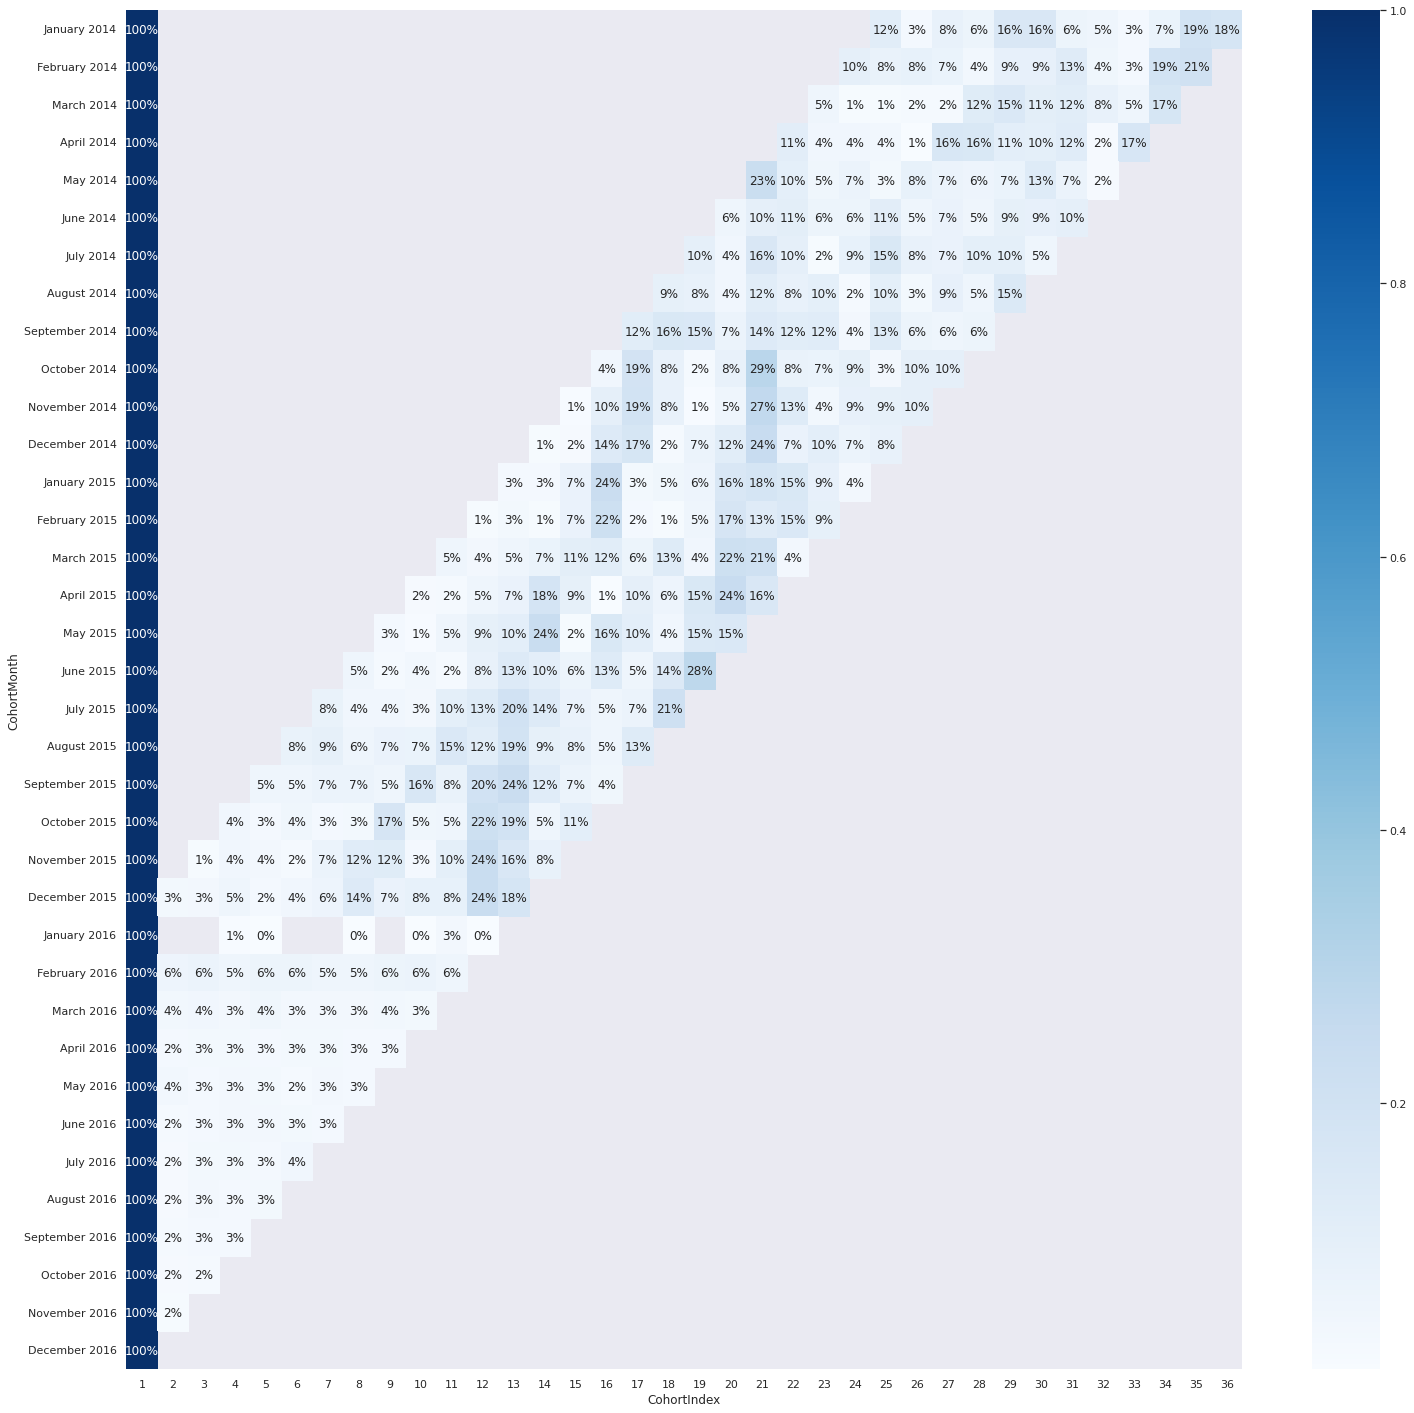

In [ ]:
# create percentages
plt.figure(figsize=(25,25))
sns.heatmap(new_cohort_table, annot=True, cmap='Blues',fmt='.0%')

In [77]:
pip install jovian

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
import jovian
jovian.commit(project="codegnanproject")

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
